In [22]:
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split

In [2]:
#Genere un conjunto de datos compuesto por muchos círculos dispersos en el espacio de dos dimensiones.
#Los puntos dentro de los circulos pertenecen a la categoría "dentro" y los que caen fuera a "fuera"
#Compare con SVM o con RN

In [3]:
#Genero mi espacio
random.seed(5)
a=1000
n=5
nc=1000
x1 = np.random.uniform(-a,a,nc)
x2 = np.random.uniform(-a,a,nc)

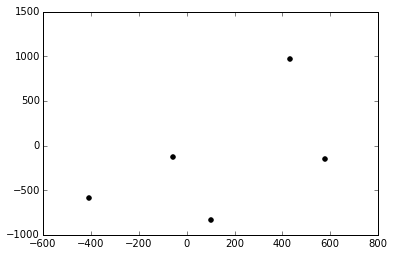

In [12]:
#Genero mis centros
def centros (a,n):
    centros1 = []
    centros2 = []
    for i in range(n):
        c1 = np.random.uniform(-a,a)
        centros1.append(c1)
        c2 = np.random.uniform(-a,a)
        centros2.append(c2)
    return (centros1,centros2)

centro = centros(a,n)
centro1=centro[0]
centro2=centro[1]

plt.scatter(centro1, centro2, s=20, color='black')

In [13]:
y = []
R = 200

for i in range(nc):
    y1=0
    for j in range(n):
        if ((((x1[i]-centro1[j])**2)+((x2[i]-centro2[j])**2)) < R**2):
            y1 = 1       
    y.append(y1)

In [14]:
XY = []
for k in range (nc):
    XY.append([x1[k],x2[k],y[k]])
    
punto = pd.DataFrame(XY,columns=['x1','x2','y'])

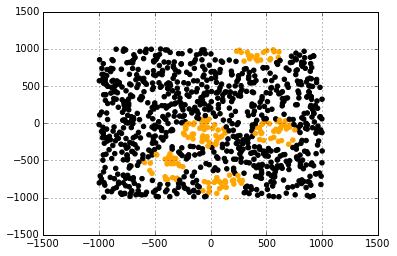

In [15]:
# LOS PUNTOS
def puntos (nc,n):
    Y = []
    R = 50
    for i in range(nc,n):
        y1=0
        for j in range(n):
            if ((((x1[i]-centro1[j])**2)+((x2[i]-centro2[j])**2)) < R**2):
                y1 = 1       
        Y.append(y1)
    XY = []
    for k in range (nc):
        XY.append([x1[k],x2[k],y[k]])   
    XY = pd.DataFrame(XY,columns=['x1','x2','y'])
    return XY

punto=puntos(nc,n)

#plt.scatter(punto['x1'], punto['x2'], s=30, c=punto['y'], cmap=plt.cm.autumn_r)
plt.scatter(punto['x1'], punto['x2'], 
            color=['black' if i==0 else 'orange' for i in punto['y']] )
plt.grid()

In [16]:
# TRAIN Y TEST
X_train, X_test, Y_train, Y_test = train_test_split(punto[['x1','x2']], punto[['y']], train_size=0.75)

In [18]:
# MÁQUINA DE SOPORTE VECTORIAL
mod = svm.SVC(kernel='rbf',gamma=2)
mod.fit(punto[['x1','x2']],punto['y'])

res1 = mod.decision_function(zip(X_test.iloc[:,0],X_test.iloc[:,1]))
#res1

In [19]:
umbral = 0

y_predict = []

for i in range(len(res1)):
    if res1[i] > umbral:
        y_predict.append(1)
    else:
        y_predict.append(0)

1.0


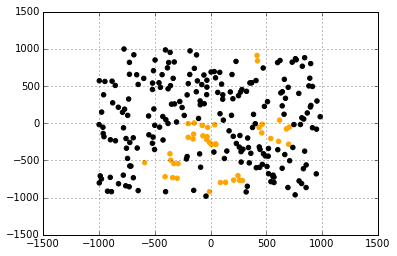

In [20]:
#y_predict
#plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=30, c=y_predict, cmap=plt.cm.autumn_r)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], 
            color=['black' if i==0 else 'orange' for i in y_predict] )
plt.grid()

fpr,tpr,umbrales = roc_curve(Y_test.iloc[:,0],res1)
#print(fpr)
#print(tpr)
#print(umbrales)
print(auc(fpr,tpr))

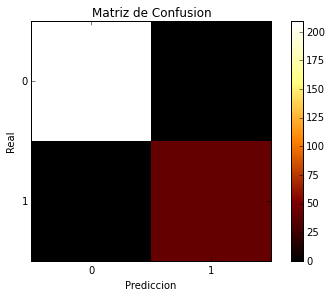

In [24]:
cm_normalized = confusion_matrix(Y_test.iloc[:,0],y_predict,labels=[0,1])
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.get_cmap('afmhot'))
plt.title("Matriz de Confusion")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0","1"])
plt.yticks(tick_marks, ["0","1"])
plt.tight_layout()
plt.ylabel('Real')
plt.xlabel('Prediccion')

In [25]:
# K- vecinos
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train) 

/Users/pedrohserrano/.graphlab/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [27]:
res2 = neigh.predict(X_test)

umbral = 0

y_predict2 = []

for i in range(len(res2)):
    if res2[i] > umbral:
        y_predict2.append(1)
    else:
        y_predict2.append(0)

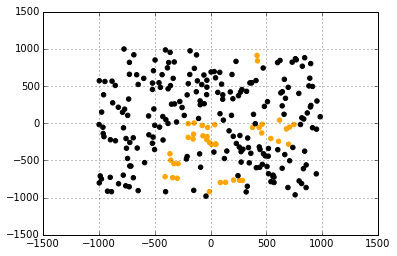

In [28]:
#y_predict2
#plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=30, c=y_predict2, cmap=plt.cm.autumn_r)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], 
            color=['black' if i==0 else 'orange' for i in y_predict2] )
plt.grid()


In [84]:
fpr,tpr,umbrales = roc_curve(Y_test.iloc[:,0],y_predict2)
print(auc(fpr,tpr))

0.947722370258


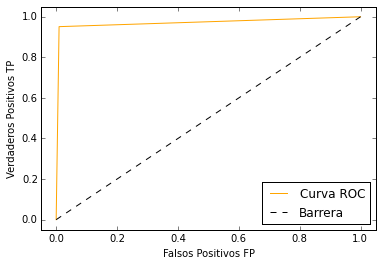

In [29]:
#plt1 = plt.figure()
#pltreal = plt1.add_subplot(111)
#plt.plot(fpr,tpr)

fpr, tpr, thresholds = roc_curve(Y_test.iloc[:,0], y_predict2)
plt.plot(fpr, tpr, lw=1, color='orange', label='Curva ROC')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color='black', label='Barrera')
plt.xlabel('Falsos Positivos FP')
plt.ylabel('Verdaderos Positivos TP')
plt.legend(loc="lower right")

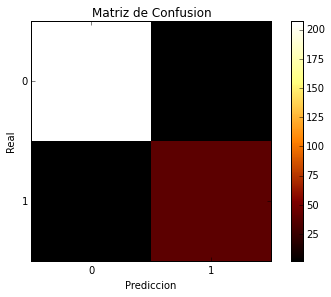

In [30]:
cm_normalized2 = confusion_matrix(Y_test.iloc[:,0],y_predict2,labels=[0,1])
plt.imshow(cm_normalized2, interpolation='nearest', cmap=plt.cm.get_cmap('afmhot'))
plt.title("Matriz de Confusion")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0","1"])
plt.yticks(tick_marks, ["0","1"])
plt.tight_layout()
plt.ylabel('Real')
plt.xlabel('Prediccion')